In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from pandas import Series
from matplotlib import pyplot
import matplotlib.ticker as ticker

In [2]:
data = pd.read_csv('data_years_25.csv')
data['date'] = pd.to_datetime(data['date'])
data

,date,open,high,low,close,adj_close,volume
0,2022-09-29,3687.01,3687.01,3610.40,3640.47,3640.47,4681810000
1,2022-09-28,3651.94,3736.74,3640.61,3719.04,3719.04,4684850000
2,2022-09-27,3686.44,3717.53,3623.29,3647.29,3647.29,4577740000
3,2022-09-26,3682.72,3715.67,3644.76,3655.04,3655.04,4886140000
4,2022-09-23,3727.14,3727.14,3647.47,3693.23,3693.23,5144270000
...,...,...,...,...,...,...,...
6264,1997-11-06,942.76,942.85,934.16,938.03,938.03,522890000
6265,1997-11-05,940.76,949.62,938.16,942.76,942.76,565680000
6266,1997-11-04,938.99,941.40,932.66,940.76,940.76,541590000
6267,1997-11-03,914.62,939.02,914.62,938.99,938.99,564740000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       6269 non-null   datetime64[ns]
 1   open       6269 non-null   float64       
 2   high       6269 non-null   float64       
 3   low        6269 non-null   float64       
 4   close      6269 non-null   float64       
 5   adj_close  6269 non-null   float64       
 6   volume     6269 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 343.0 KB


## Построение временных рядов


#### Цена открытия, open

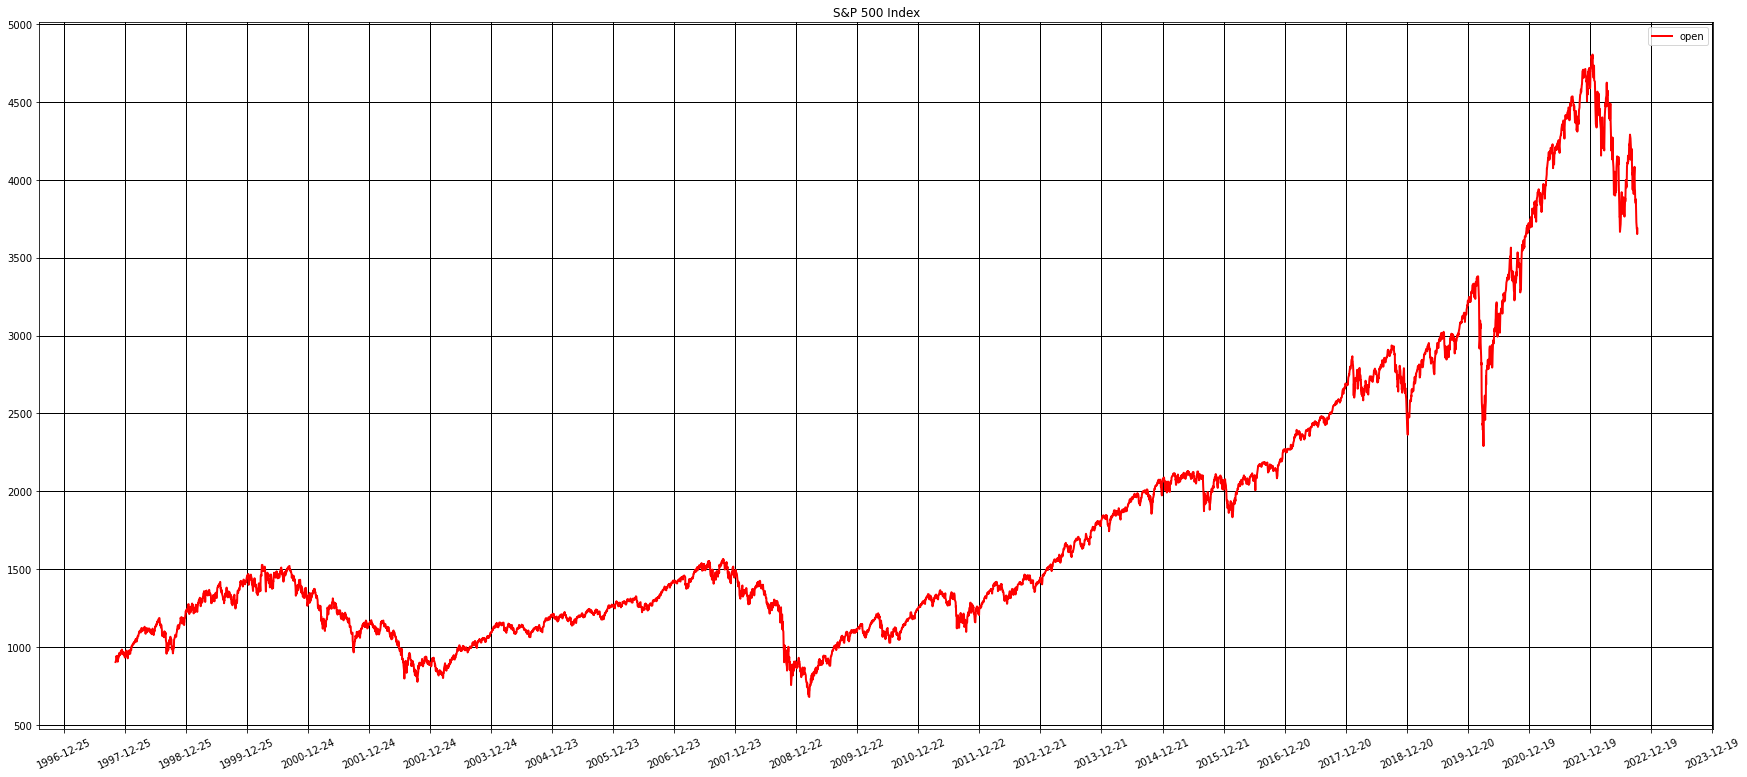

In [3]:
fig, ax = plt.subplots()

ax.plot(data['date'], data['open'], 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

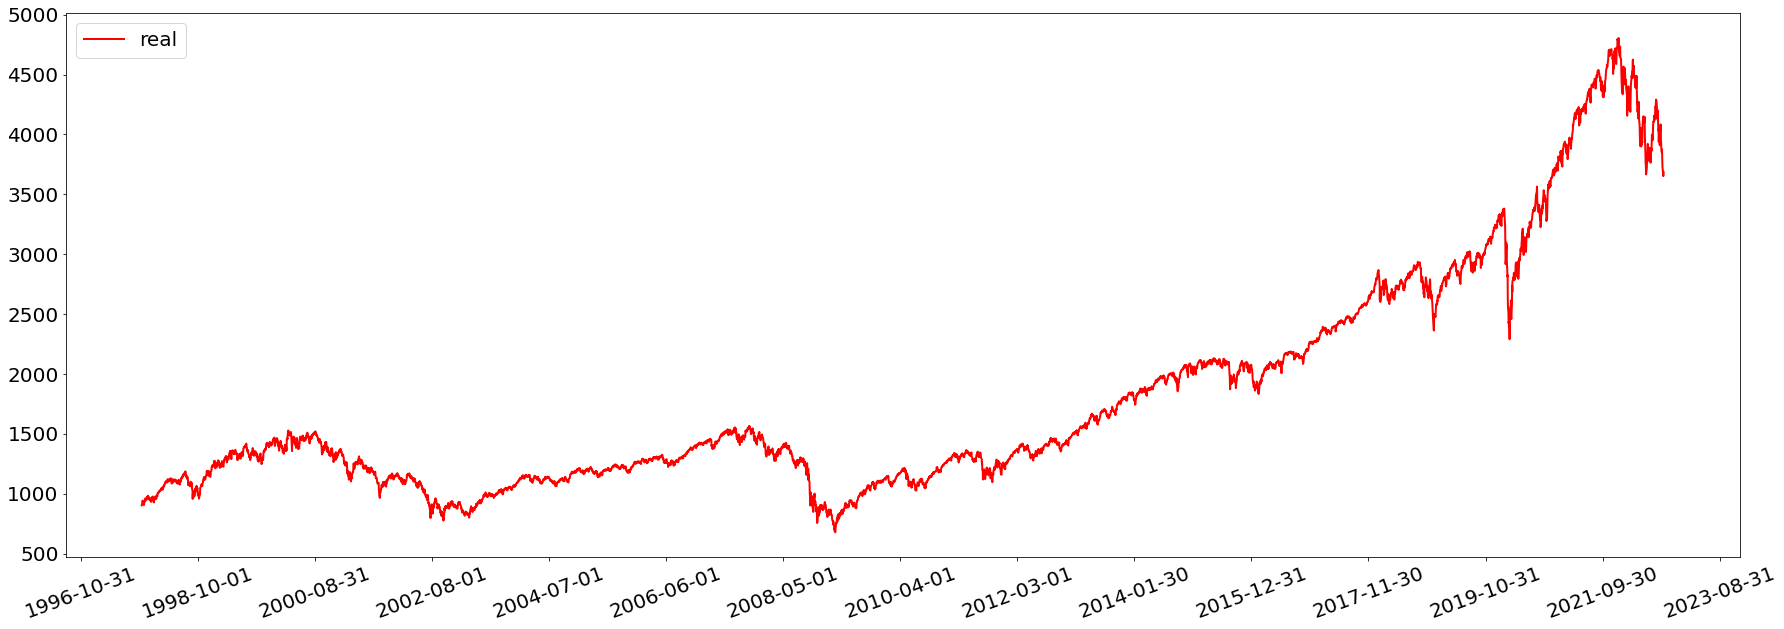

In [4]:
plt.rcParams['font.size'] = '20'
plt.figure(figsize=(30, 10))

plt.plot(data['date'], data['open'], 'r', linewidth=2, label='real')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(700))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))
plt.xticks(rotation=20)


plt.legend()
plt.show()

In [5]:
# Найдем минимальное значение между концом 2008 и концом 2009 года
min_open = min(data[data['date'] > '2008-12-22'][data['date'] < '2009-12-22']['open'])
min_open_date = data[data['open'] == min_open]['date']
data_actual = pd.DataFrame(data[data['date'] > min_open_date.values[0]])
data_actual

<ipython-input-5-cf0488fa2932>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  min_open = min(data[data['date'] > '2008-12-22'][data['date'] < '2009-12-22']['open'])


,date,open,high,low,close,adj_close,volume
0,2022-09-29,3687.01,3687.01,3610.40,3640.47,3640.47,4681810000
1,2022-09-28,3651.94,3736.74,3640.61,3719.04,3719.04,4684850000
2,2022-09-27,3686.44,3717.53,3623.29,3647.29,3647.29,4577740000
3,2022-09-26,3682.72,3715.67,3644.76,3655.04,3655.04,4886140000
4,2022-09-23,3727.14,3727.14,3647.47,3693.23,3693.23,5144270000
...,...,...,...,...,...,...,...
3409,2009-03-17,753.88,778.12,749.93,778.12,778.12,6156800000
3410,2009-03-16,758.84,774.53,753.37,753.89,753.89,7883540000
3411,2009-03-13,751.97,758.29,742.46,756.55,756.55,6787090000
3412,2009-03-12,720.89,752.63,714.76,750.74,750.74,7326630000


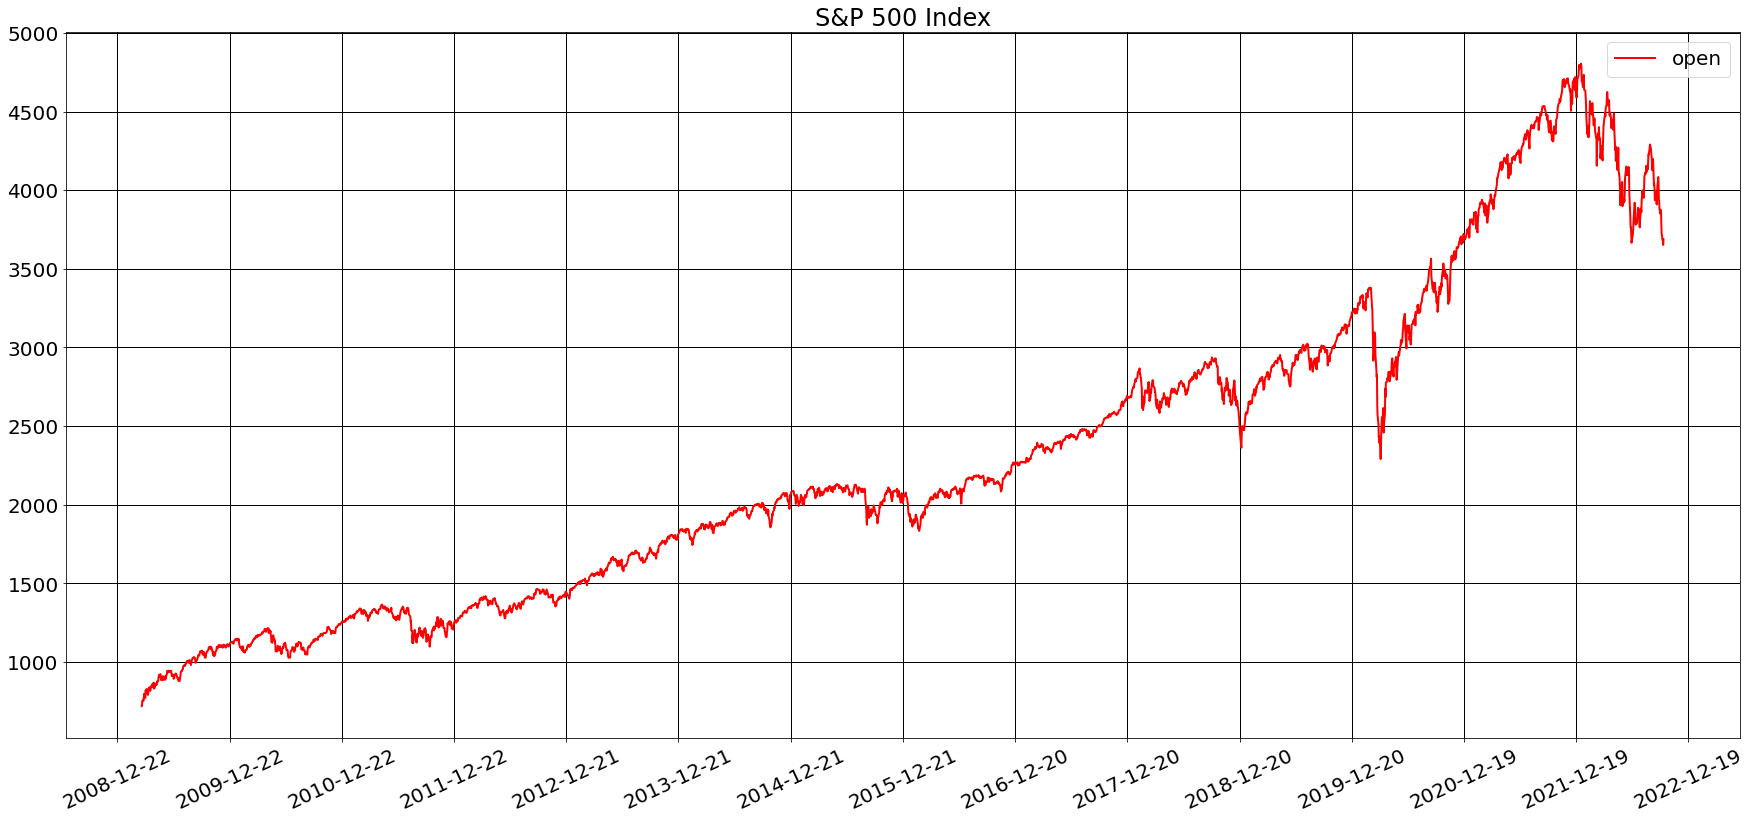

In [21]:
fig, ax = plt.subplots()

ax.plot(data_actual['date'], data_actual['open'], 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

Данных о некоторых днях нет, поэтому необходимо заполнить эти пропуски


In [7]:
city_data = {
    'date':pd.date_range(start = "20090311", end = "20220929", freq = "D"),
}
all_data = pd.DataFrame(city_data)
all_data

,date
0,2009-03-11
1,2009-03-12
2,2009-03-13
3,2009-03-14
4,2009-03-15
...,...
4946,2022-09-25
4947,2022-09-26
4948,2022-09-27
4949,2022-09-28


In [10]:
all_data = all_data.merge(data_actual, on='date', how='left')
all_data.

,date,open,high,low,close,adj_close,volume
0,2009-03-11,719.59,731.92,713.85,721.36,721.36,7.287810e+09
1,2009-03-12,720.89,752.63,714.76,750.74,750.74,7.326630e+09
2,2009-03-13,751.97,758.29,742.46,756.55,756.55,6.787090e+09
3,2009-03-14,NaN,NaN,NaN,NaN,NaN,NaN
4,2009-03-15,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
4946,2022-09-25,NaN,NaN,NaN,NaN,NaN,NaN
4947,2022-09-26,3682.72,3715.67,3644.76,3655.04,3655.04,4.886140e+09
4948,2022-09-27,3686.44,3717.53,3623.29,3647.29,3647.29,4.577740e+09
4949,2022-09-28,3651.94,3736.74,3640.61,3719.04,3719.04,4.684850e+09


In [12]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4951 entries, 0 to 4950
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       4951 non-null   datetime64[ns]
 1   open       3414 non-null   float64       
 2   high       3414 non-null   float64       
 3   low        3414 non-null   float64       
 4   close      3414 non-null   float64       
 5   adj_close  3414 non-null   float64       
 6   volume     3414 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 309.4 KB


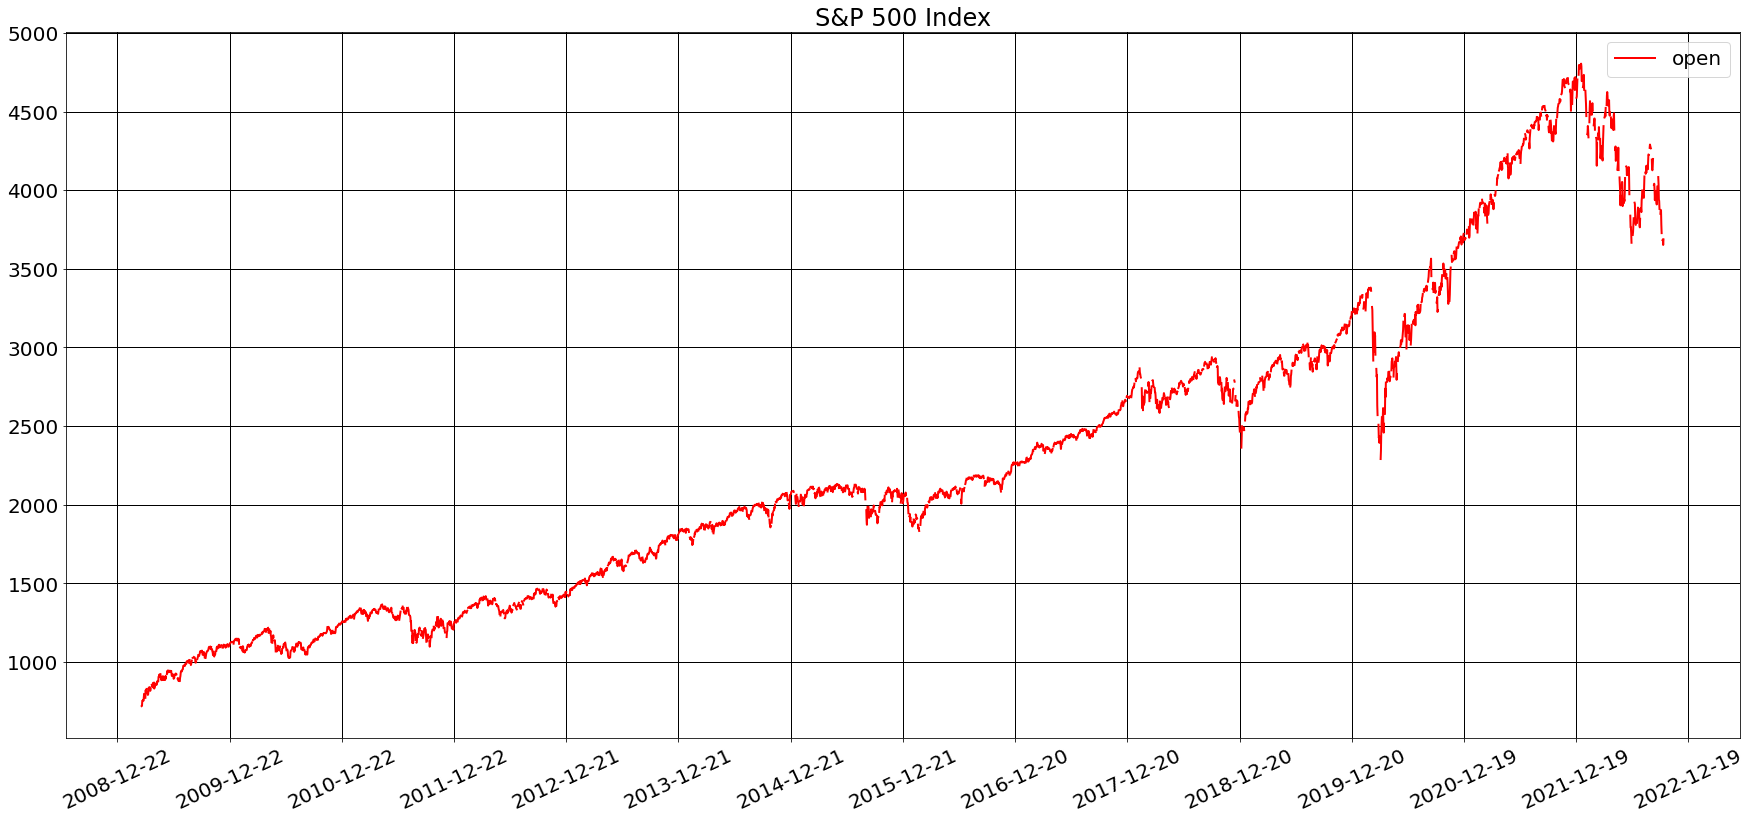

In [11]:
fig, ax = plt.subplots()

ax.plot(all_data['date'], all_data['open'], 'r', linewidth=2, label='real')

ax.grid(color = 'black',    #  цвет линий
        linewidth = 1,    #  толщина
        linestyle = '-')    #  начертание


plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(365))  # интервал написания значений оси OX
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(500))  # интервал написания значений оси OY
plt.xticks(rotation=25)

fig.set_figwidth(30)
fig.set_figheight(13)

plt.title("S&P 500 Index")
plt.legend(pd.DataFrame(data.open))
plt.show()

<ipython-input-83-f85cdcc213a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_actual = data[data['date'] > '2022-02-20'][data['date'] < '2022-09-15']


          date     open     high      low    close  adj_close      volume
11  2022-09-14  3940.73  3961.94  3912.18  3946.01    3946.01  4293240000
12  2022-09-13  4037.12  4037.12  3921.28  3932.69    3932.69  4224550000
13  2022-09-12  4083.67  4119.28  4083.67  4110.41    4110.41  3814200000
14  2022-09-09  4022.94  4076.81  4022.94  4067.36    4067.36  3901940000
15  2022-09-08  3959.94  4010.50  3944.81  4006.18    4006.18  3966850000
..         ...      ...      ...      ...      ...        ...         ...
148 2022-02-28  4354.17  4388.84  4315.12  4373.94    4373.94  4594010000
149 2022-02-25  4298.38  4385.34  4286.83  4384.65    4384.65  3941780000
150 2022-02-24  4155.77  4294.73  4114.65  4288.70    4288.70  5070560000
151 2022-02-23  4324.93  4341.51  4221.51  4225.50    4225.50  3814340000
152 2022-02-22  4332.74  4362.12  4267.11  4304.76    4304.76  4007780000

[142 rows x 7 columns]


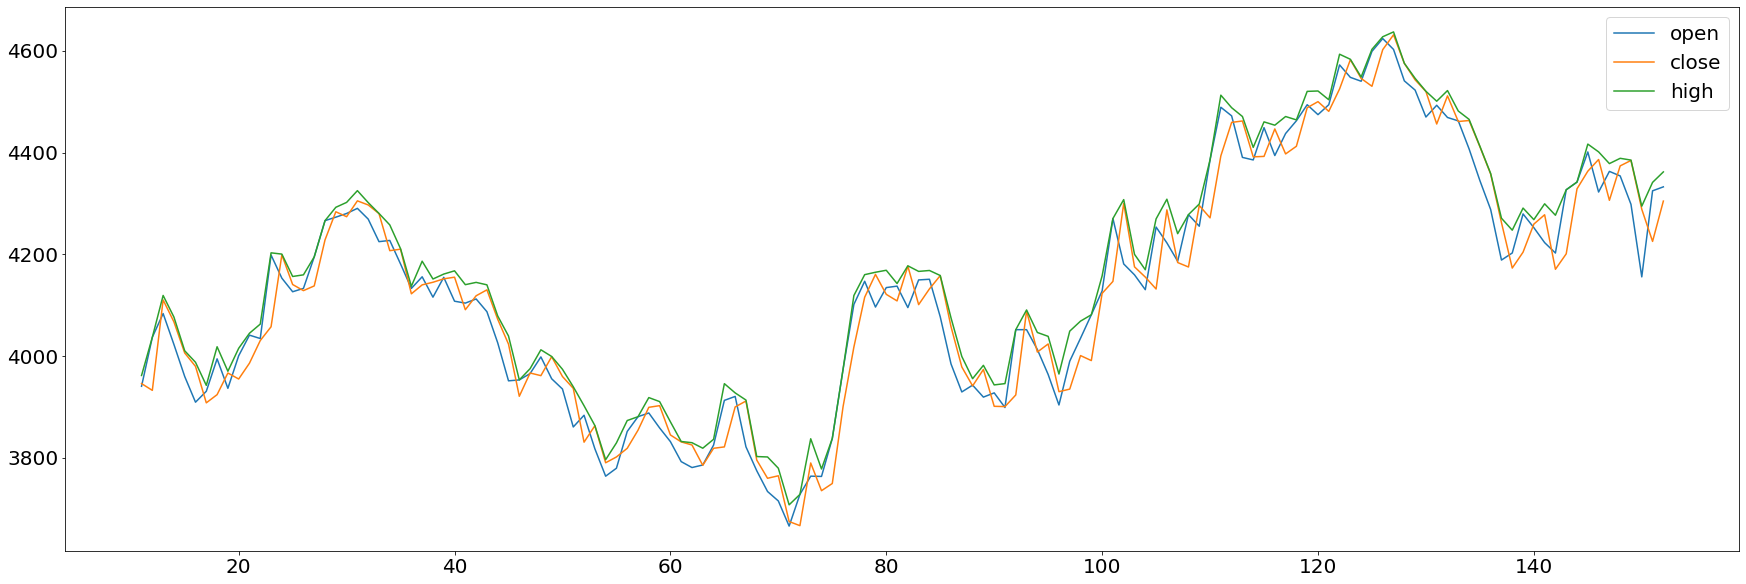

In [83]:
data_actual = data[data['date'] > '2022-02-20'][data['date'] < '2022-09-15']
print(data_actual)

plt.rcParams['font.size'] = '20'
fig, ax = plt.subplots()


# ax.plot(data['date'])

data_actual['open'].plot(label='open', figsize=(30, 10))
data_actual['close'].plot(label='close')
data_actual['high'].plot(label='high')

ax.legend()
plt.show()